# Lecture 5 notes - freefall

## Motion of raindrop: algebraic solution

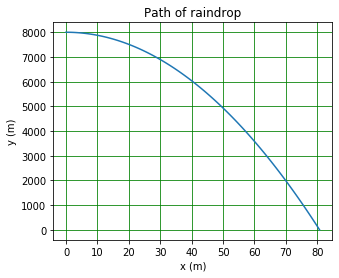

 
tMax =  40.4 s.


In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#
x0 = 0.0
y0 = 8000 # m
ux = 2 # m/s
uy = 0 # m/s
g = -9.81 # m/s**2
#
tMax = np.sqrt(-2*y0/g)
nPlot = 100
tArr = np.linspace(0.0, tMax, nPlot)
xArr = ux*tArr + x0
yArr = g*tArr**2/2 + uy*tArr + y0 
plt.figure(figsize = (5, 4))
plt.title("Path of raindrop")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.plot(xArr, yArr)
plt.grid(color = 'g')
plt.show()
print(" ")
print("tMax = {:5.3} s.".format(tMax))

Velocity at ground

In [25]:
vyMax = -g*tMax + uy
print("vyMax = {:5.3f} m/s.".format(vyMax))

vyMax = 396.182 m/s.


Terminal velocity of 2 mm radius drop.

In [26]:
CD = 0.47
rDrop = 0.002 # m
rhoAir = 1.2 # kg/m**3
rhoWater = 1000 # kg/m**3
Vdrop = 4*np.pi*rDrop**3/3
Adrop = np.pi*rDrop**2
mDrop = rhoWater*Vdrop
vTerm = np.sqrt(-2*mDrop*g/(CD*Adrop*rhoAir))
print("Vdrop = {:5.3e} m**3, Adrop = {:5.3e} m**2, mDrop = {:5.3e} kg.".format(Vdrop, Adrop, mDrop))
print("vTerm = {:5.3e} m/s.".format(vTerm))

Vdrop = 3.351e-08 m**3, Adrop = 1.257e-05 m**2, mDrop = 3.351e-05 kg.
vTerm = 9.632e+00 m/s.


## Solution using Euler's method

 
Time step = 2.000e-02 s, max number steps = 50481.000.
(x0, y0) = (0.000, 8000.000) m, (ux, uy) = (2.000e+00, 0.000e+00) m/s.
iStep 41566 time 831.32


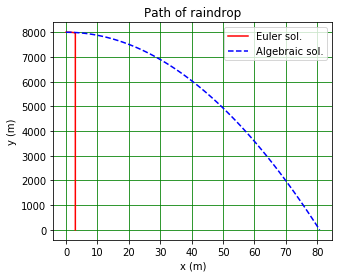

In [27]:
def drag(CD, A, rho, vx, vy):
    v2 = vx**2 + vy**2
    sinTheta = vx/np.sqrt(v2)
    cosTheta = vy/np.sqrt(v2)
    Dx = -0.5*CD*A*rho*v2*sinTheta
    Dy = -0.5*CD*A*rho*v2*cosTheta
    return Dx, Dy
#
CD = 0.47
dT = 0.02
tPlot = 25*tMax
maxSteps = int(tPlot/dT)
xDrop = np.zeros(maxSteps)
yDrop = np.zeros(maxSteps)
vxNow = ux
vyNow = uy
xNow = x0
yNow = y0
iStep = 0
print(" ")
print("Time step = {:5.3e} s, max number steps = {:5.3f}.".format(dT, maxSteps))
print("(x0, y0) = ({:5.3f}, {:5.3f}) m, (ux, uy) = ({:5.3e}, {:5.3e}) m/s.".format(x0, y0, ux, uy))
#
while iStep < maxSteps and yNow > 0:
    xDrop[iStep] = xNow
    yDrop[iStep] = yNow
    dragX, dragY = drag(CD, Adrop, rhoAir, vxNow, vyNow)
    xNow = xNow + vxNow*dT
    yNow = yNow + vyNow*dT
    vxNow = vxNow + dragX/mDrop*dT
    vyNow = vyNow + dragY/mDrop*dT + g*dT
    iStep = iStep + 1
#
print("iStep",iStep,"time",iStep*dT)
plt.figure(figsize = (5, 4))
plt.title("Path of raindrop")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.plot(xDrop[0:iStep], yDrop[0:iStep], color = 'r', label = 'Euler sol.')
plt.plot(xArr, yArr, color = 'b', linestyle = '--', label = 'Algebraic sol.')
plt.grid(color = 'g')
plt.legend()
plt.savefig("Raindrop03.png")
plt.show()

Plot velocity against time for x horizontal and vertical components.

 
tDrop = 831.320 s.
 


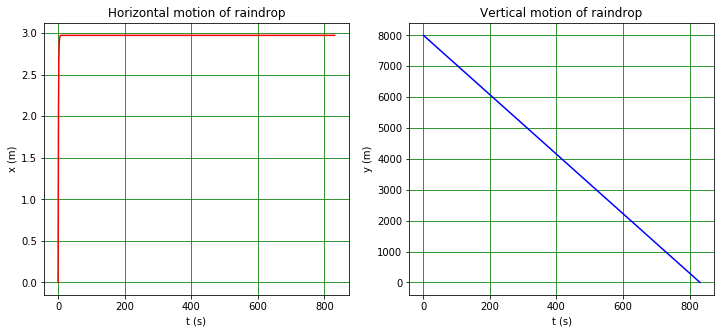

In [28]:
tGround = iStep*dT
tDrop = np.linspace(0.0, tGround, iStep + 1)
print(" ")
print("tDrop = {:5.3f} s.".format(tGround))
print(" ")
#
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot is top left
plt.title("Horizontal motion of raindrop")
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.plot(tDrop[0:iStep], xDrop[0:iStep], color = 'r')
plt.grid(color = 'g')
#
plt.subplot(1, 2, 2) # 1 row, 2 columns, fill from left to right, top to bottom
plt.title("Vertical motion of raindrop")
plt.xlabel("t (s)")
plt.ylabel("y (m)")
plt.plot(tDrop[0:iStep], yDrop[0:iStep], color = 'b')
plt.grid(color = 'g')
#
plt.savefig("Raindrop04.png")
plt.show()